In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class DBScan:
    def __init__(self, epsilon=1, min_samples=5):
        self.min_samples = min_samples
        self.epsilon = epsilon
        
        
    def predict(self, X):
        self.X = X
        self.visited_samples = []
        self.clusters = []
        self.neighbors = {}   
        
        n_samples, n_features = self.X.shape
        
        for sample_index in range(n_samples):
            if sample_index in self.visited_samples:
                continue
                
            self.neighbors[sample_index] = self.tally_neighbors(sample_index) 
            if len(self.neighbors[sample_index]) >= self.min_samples:
                # sample_i is a core point
                self.visited_samples.append(sample_index)
                # create cluster of core point sample_i
                sample_i_cluster = self.create_cluster(sample_index, self.neighbors[sample_index])
                self.clusters.append(sample_i_cluster)
                
        labels_ = self.populate_labels()
                
        return labels_
            
    
    def tally_neighbors(self, point_index):
        neighbors_indices = []
        
        for j, x_j in enumerate(self.X):
            if (j != point_index) and ( np.linalg.norm(x_j - self.X[point_index]) <= self.epsilon ):
                neighbors_indices.append(j)
                
        return np.array(neighbors_indices)
    
    
    def create_cluster(self, sample_index, neighbors):
        cluster = [sample_index]
        
        for neighbor_i in neighbors:
            if neighbor_i not in self.visited_samples:
                self.visited_samples.append(neighbor_i)
                self.neighbors[neighbor_i] = self.tally_neighbors(neighbor_i)
                
                if len(self.neighbors[neighbor_i]) >= self.min_samples:
                    neighbor_cluster = self.create_cluster(neighbor_i, self.neighbors[neighbor_i])
                    cluster += neighbor_cluster    
            else:
                cluster.append(neighbor_i)
                
        return cluster
    
    def populate_labels(self):
        labels = [len(self.clusters)] * len(self.X)
        for cluster_i, cluster in enumerate(self.clusters):
            for sample_i in cluster:
                labels[sample_i] = sample_i
        return labels

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [4]:
iris_dataset = load_iris()
X = iris_dataset.data

In [5]:
PCA_reducer = PCA(n_components=2)
X_transformed_PCA = PCA_reducer.fit_transform(X)

In [6]:
x_axis_PCA, y_axis_PCA = X_transformed_PCA.T

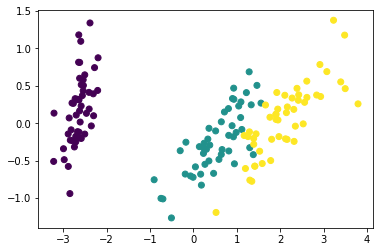

In [7]:
plt.scatter(x_axis_PCA, y_axis_PCA, c=iris_dataset.target)

In [8]:
DBSCAN_sklearn_reducer = DBSCAN(eps=.5, min_samples=4)

In [9]:
sklearn_DBSCAN = DBSCAN_sklearn_reducer.fit(X)

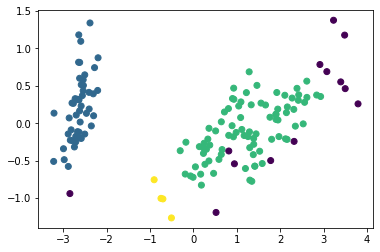

In [10]:
plt.scatter(x_axis_PCA, y_axis_PCA, c=sklearn_DBSCAN.labels_)

In [19]:
DBScan_instance = DBScan(epsilon=.5, min_samples=4)
DBScan = DBScan_instance.predict(X)

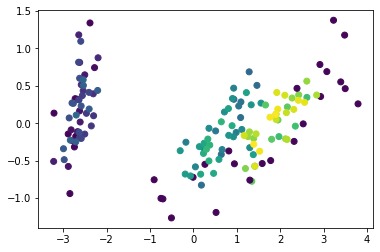

In [20]:
plt.scatter(x_axis_PCA, y_axis_PCA, c=DBScan)